# Análisis Exploratorio de Datos - Netflix Dataset

## Descripción del Proyecto
Este proyecto realiza un **Análisis Exploratorio de Datos (EDA)** completo del catálogo de Netflix, utilizando las librerías más importantes de Python para ciencia de datos:

- **Pandas**: Manipulación y limpieza de datos
- **NumPy**: Operaciones numéricas
- **Matplotlib**: Visualizaciones básicas
- **Seaborn**: Visualizaciones estadísticas avanzadas

## Objetivos
1. Limpiar y preparar los datos
2. Analizar patrones y tendencias del contenido
3. Crear visualizaciones informativas
4. Extraer insights valiosos del negocio

# VISUALIZACIONES DE DATOS DE NETFLIX

En esta sección crearemos gráficos sencillos pero informativos para analizar el contenido de Netflix.

In [2]:
# ========================================
# IMPORTACIÓN DE LIBRERÍAS
# ========================================

# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [7]:
# ========================================
# CARGA Y EXPLORACIÓN INICIAL DE DATOS
# ========================================

# Cargar el dataset
df = pd.read_csv("netflix_titles.csv")

print(f"Dataset cargado exitosamente")
print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset cargado exitosamente
Dimensiones: 8,790 filas x 10 columnas
Memoria utilizada: 4.66 MB


In [8]:
# Mostrar nombres de las columnas disponibles
print("\nCOLUMNAS DISPONIBLES:")
print(list(df.columns))
print(f"\nTotal de columnas: {len(df.columns)}")

# Mostrar información básica del dataset
print("\nINFORMACIÓN BÁSICA:")
df.info()


COLUMNAS DISPONIBLES:
['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']

Total de columnas: 10

INFORMACIÓN BÁSICA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
# Vista previa de los datos
print("PRIMERAS 5 FILAS DEL DATASET:")
print("="*50)
df.head()

PRIMERAS 5 FILAS DEL DATASET:


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# ========================================
# ANÁLISIS DE CALIDAD DE DATOS
# ========================================

print("VALORES FALTANTES POR COLUMNA:")
print("="*40)
valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(df)) * 100

resumen_faltantes = pd.DataFrame({
    'Valores_Faltantes': valores_faltantes,
    'Porcentaje': porcentaje_faltantes
}).round(2)

print(resumen_faltantes[resumen_faltantes['Valores_Faltantes'] > 0])

# Análisis específico de directores
print("\nANÁLISIS DE DIRECTORES:")
print(f"Directors únicos: {df['director'].nunique():,}")
print(f"Entradas 'Not Given': {(df['director'] == 'Not Given').sum():,}")

# Obtener información general del dataset: tipos de datos, valores no nulos, memoria utilizada
df.info()

VALORES FALTANTES POR COLUMNA:
Empty DataFrame
Columns: [Valores_Faltantes, Porcentaje]
Index: []

ANÁLISIS DE DIRECTORES:
Directors únicos: 4,528
Entradas 'Not Given': 2,588
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
# ========================================
# LIMPIEZA Y PREPARACIÓN DE DATOS
# ========================================

print("INICIANDO PROCESO DE LIMPIEZA...")


# 1. Reemplazar 'Not Given' con NaN para mejor manejo
df['director'] = df['director'].replace('Not Given', np.nan)
df['country'] = df['country'].replace('Not Given', np.nan)

print("Valores 'Not Given' convertidos a NaN")

# Contar la frecuencia de cada director para identificar valores más comunes
print("\nTOP 10 DIRECTORES MÁS FRECUENTES:")
df['director'].value_counts().head(10)

INICIANDO PROCESO DE LIMPIEZA...
Valores 'Not Given' convertidos a NaN

TOP 10 DIRECTORES MÁS FRECUENTES:


director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Name: count, dtype: int64

In [ ]:
# Reemplazar 'Not Given' con NaN en la columna director para tratarlo como valor faltante
df['director'] = df['director'].replace('Not Given', np.nan)

# 3. Análisis y limpieza de países
print("ANÁLISIS DE PAÍSES:")
print(f"Países únicos: {df['country'].nunique():,}")
print(f"Valores faltantes: {df['country'].isnull().sum():,}")

# Mostrar top 10 países
print("\nTOP 10 PAÍSES:")
print(df['country'].value_counts().head(10))

In [10]:
# Crear un nuevo dataset eliminando filas donde la columna 'director' es NaN
df_limpio = df.dropna(subset=['director'])

# 6. Procesamiento de fechas y creación de nuevas variables
print("PROCESAMIENTO DE FECHAS:")

# Limpiar fecha de agregación
df_limpio = df_limpio.dropna(subset=['date_added']).copy()
df_limpio['date_added'] = pd.to_datetime(df_limpio['date_added'])

# Crear nuevas columnas temporales
df_limpio['added_year'] = df_limpio['date_added'].dt.year
df_limpio['added_month'] = df_limpio['date_added'].dt.month
df_limpio['added_day_of_week'] = df_limpio['date_added'].dt.day_name()

# Crear columna de género principal
df_limpio['genero_principal'] = df_limpio['listed_in'].str.split(',').str[0].str.strip()

print(f"Variables temporales creadas")
print(f"Género principal extraído")
print(f"Dataset final: {len(df_limpio):,} registros")

PROCESAMIENTO DE FECHAS:
Variables temporales creadas
Género principal extraído
Dataset final: 6,202 registros


In [ ]:
# Analizar la distribución de países para identificar valores más frecuentes
df_limpio['country'].value_counts()

In [ ]:
# Calcular la moda (valor más frecuente) de la columna 'country'
moda_pais = df_limpio['country'].mode()[0]
print(f"País más frecuente: {moda_pais}")
print(f"Apariciones: {(df_limpio['country'] == moda_pais).sum():,}")

In [ ]:
# Eliminar filas donde la columna 'release_year' tiene valores faltantes
df_limpio = df_limpio.dropna(subset=['release_year'])

In [11]:
# Crear nueva columna 'genero_principal' extrayendo el primer género de 'listed_in'
df_limpio['genero_principal'] = df_limpio['listed_in'].str.split(',').str[0].str.strip()
print(f"Género principal extraido para {len(df_limpio):,} registros")
print(f"Géneros únicos: {df_limpio['genero_principal'].nunique():,}")

# Mostrar algunos ejemplos
print("\nPrimeros 5 géneros principales:")
print(df_limpio['genero_principal'].head())

Género principal extraido para 6,202 registros
Géneros únicos: 33

Primeros 5 géneros principales:
0               Documentaries
1              Crime TV Shows
2                   TV Dramas
3    Children & Family Movies
4                      Dramas
Name: genero_principal, dtype: object


In [ ]:
# Mostrar las primeras filas con la nueva columna de género principal
df_limpio.head()

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Preguntas de Negocio a Responder:
1. ¿Hay más películas o series en Netflix?
2. ¿Cuáles son los géneros más populares?
3. ¿Qué país produce más contenido?
4. ¿Cómo ha evolucionado el contenido a lo largo del tiempo?

En esta sección analizaremos estas preguntas usando el dataset limpio.

In [ ]:
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

## Preguntas de Negocio a Responder:
# 1. ¿Hay más películas o series en Netflix?
# 2. ¿Cuáles son los géneros más populares?
# 3. ¿Qué país produce más contenido?
# 4. ¿Cómo ha evolucionado el contenido a lo largo del tiempo?

# EJERCICIO 1 - EDA
# Distribución de Contenido: ¿Hay más películas (Movie) o series (TV Show) en Netflix? 
# ¿Cuál es el porcentaje de cada una? (Usa df_limpio['type'].value_counts()).

df_limpio['type'].value_counts()

In [12]:
# ========================================
# 1. DISTRIBUCIÓN DE CONTENIDO: PELÍCULAS VS SERIES
# ========================================

# Conteo absoluto
conteo_tipos = df_limpio['type'].value_counts()
print("DISTRIBUCIÓN DE CONTENIDO:")
print("="*30)
for tipo, cantidad in conteo_tipos.items():
    print(f"{tipo}: {cantidad:,} ({(cantidad/len(df_limpio)*100):.1f}%)")

# Análisis con porcentajes
porcentajes = df_limpio['type'].value_counts(normalize=True) * 100
print(f"\nConclusión: Netflix tiene {porcentajes.iloc[0]:.1f}% de {porcentajes.index[0].lower()}s")

DISTRIBUCIÓN DE CONTENIDO:
Movie: 5,953 (96.0%)
TV Show: 249 (4.0%)

Conclusión: Netflix tiene 96.0% de movies


In [13]:
# ========================================
# 2. ANÁLISIS DE GÉNEROS MÁS POPULARES
# ========================================

top_generos = df_limpio['genero_principal'].value_counts().head(10)
print("TOP 10 GÉNEROS MÁS POPULARES:")
print("="*40)
for i, (genero, cantidad) in enumerate(top_generos.items(), 1):
    porcentaje = (cantidad/len(df_limpio)*100)
    print(f"{i:2d}. {genero:<25} {cantidad:>4,} ({porcentaje:>5.1f}%)")

print(f"\nGénero dominante: {top_generos.index[0]} representa el {(top_generos.iloc[0]/len(df_limpio)*100):.1f}% del contenido")

TOP 10 GÉNEROS MÁS POPULARES:
 1. Dramas                    1,586 ( 25.6%)
 2. Comedies                  1,188 ( 19.2%)
 3. Action & Adventure         851 ( 13.7%)
 4. Documentaries              780 ( 12.6%)
 5. Children & Family Movies   574 (  9.3%)
 6. Stand-Up Comedy            309 (  5.0%)
 7. Horror Movies              274 (  4.4%)
 8. International Movies       123 (  2.0%)
 9. Classic Movies              80 (  1.3%)
10. Thrillers                   65 (  1.0%)

Género dominante: Dramas representa el 25.6% del contenido


In [ ]:
# ========================================
# 3. ANÁLISIS DE DIRECTORES MÁS PROLÍFICOS
# ========================================

top_directores = df_limpio['director'].value_counts().head(10)
print("TOP 10 DIRECTORES MÁS PROLÍFICOS:")
print("="*45)
for i, (director, cantidad) in enumerate(top_directores.items(), 1):
    print(f"{i:2d}. {director:<30} {cantidad:>3} contenidos")

# Análisis adicional
total_directores = df_limpio['director'].nunique()
promedio_contenido = len(df_limpio) / total_directores
print(f"\nEstadísticas de directores:")
print(f"   • Total de directores: {total_directores:,}")
print(f"   • Promedio de contenido por director: {promedio_contenido:.1f}")
print(f"   • Director más prolífico: {top_directores.index[0]} ({top_directores.iloc[0]} contenidos)")

# VISUALIZACIONES DE DATOS CON MATPLOTLIB Y SEABORN

En esta sección crearemos visualizaciones profesionales que demuestren insights del negocio.

## Análisis de Países Productores
¿Qué país ha producido la mayor cantidad de películas? (Esto requiere filtrar primero por type == 'Movie' y luego agrupar por country).

In [18]:
# Filtrar solo películas para el análisis de países productores
peliculas = df_limpio[df_limpio['type'] == 'Movie']
print(f"Total de películas: {len(peliculas):,}")
print(f"Países productores de películas: {peliculas['country'].nunique():,}")

# Mostrar top 10 países productores de películas
print("\nTOP 10 PAÍSES PRODUCTORES DE PELÍCULAS:")
peliculas['country'].value_counts().head(10)

Total de películas: 5,953
Países productores de películas: 78

TOP 10 PAÍSES PRODUCTORES DE PELÍCULAS:


country
United States     2336
India              964
United Kingdom     369
Canada             184
France             148
Spain              127
Egypt              107
Nigeria             96
Mexico              89
Japan               86
Name: count, dtype: int64

In [ ]:
# Importar matplotlib para crear gráficos
import matplotlib.pyplot as plt

# Configurar el tamaño de los gráficos
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 1. GRÁFICO DE BARRAS: Películas vs Series
plt.figure(figsize=(8, 5))

# Contar películas y series
conteo_tipos = df_limpio['type'].value_counts()

# Crear gráfico de barras
plt.bar(conteo_tipos.index, conteo_tipos.values, color=['#E50914', '#221F1F'])
plt.title('Distribución de Contenido en Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Contenido', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
# Agregar valores encima de las barras
for i, v in enumerate(conteo_tipos.values):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# ========================================
# 2. GRÁFICO DE GÉNEROS MÁS POPULARES
# ========================================

plt.figure(figsize=(14, 8))

# Obtener top 12 géneros para mejor visualización
top_generos = df_limpio['genero_principal'].value_counts().head(12)

# Crear gráfico horizontal con seaborn
sns.barplot(y=top_generos.index, x=top_generos.values, 
            palette='viridis', orient='h')

plt.title('Top 12 Géneros Más Populares en Netflix', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cantidad de Contenido', fontsize=12)
plt.ylabel('Género', fontsize=12)

# Agregar valores al final de cada barra
for i, v in enumerate(top_generos.values):
    plt.text(v + 10, i, f'{v:,}', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"INSIGHT: El género más popular es '{top_generos.index[0]}' con {top_generos.iloc[0]:,} contenidos")

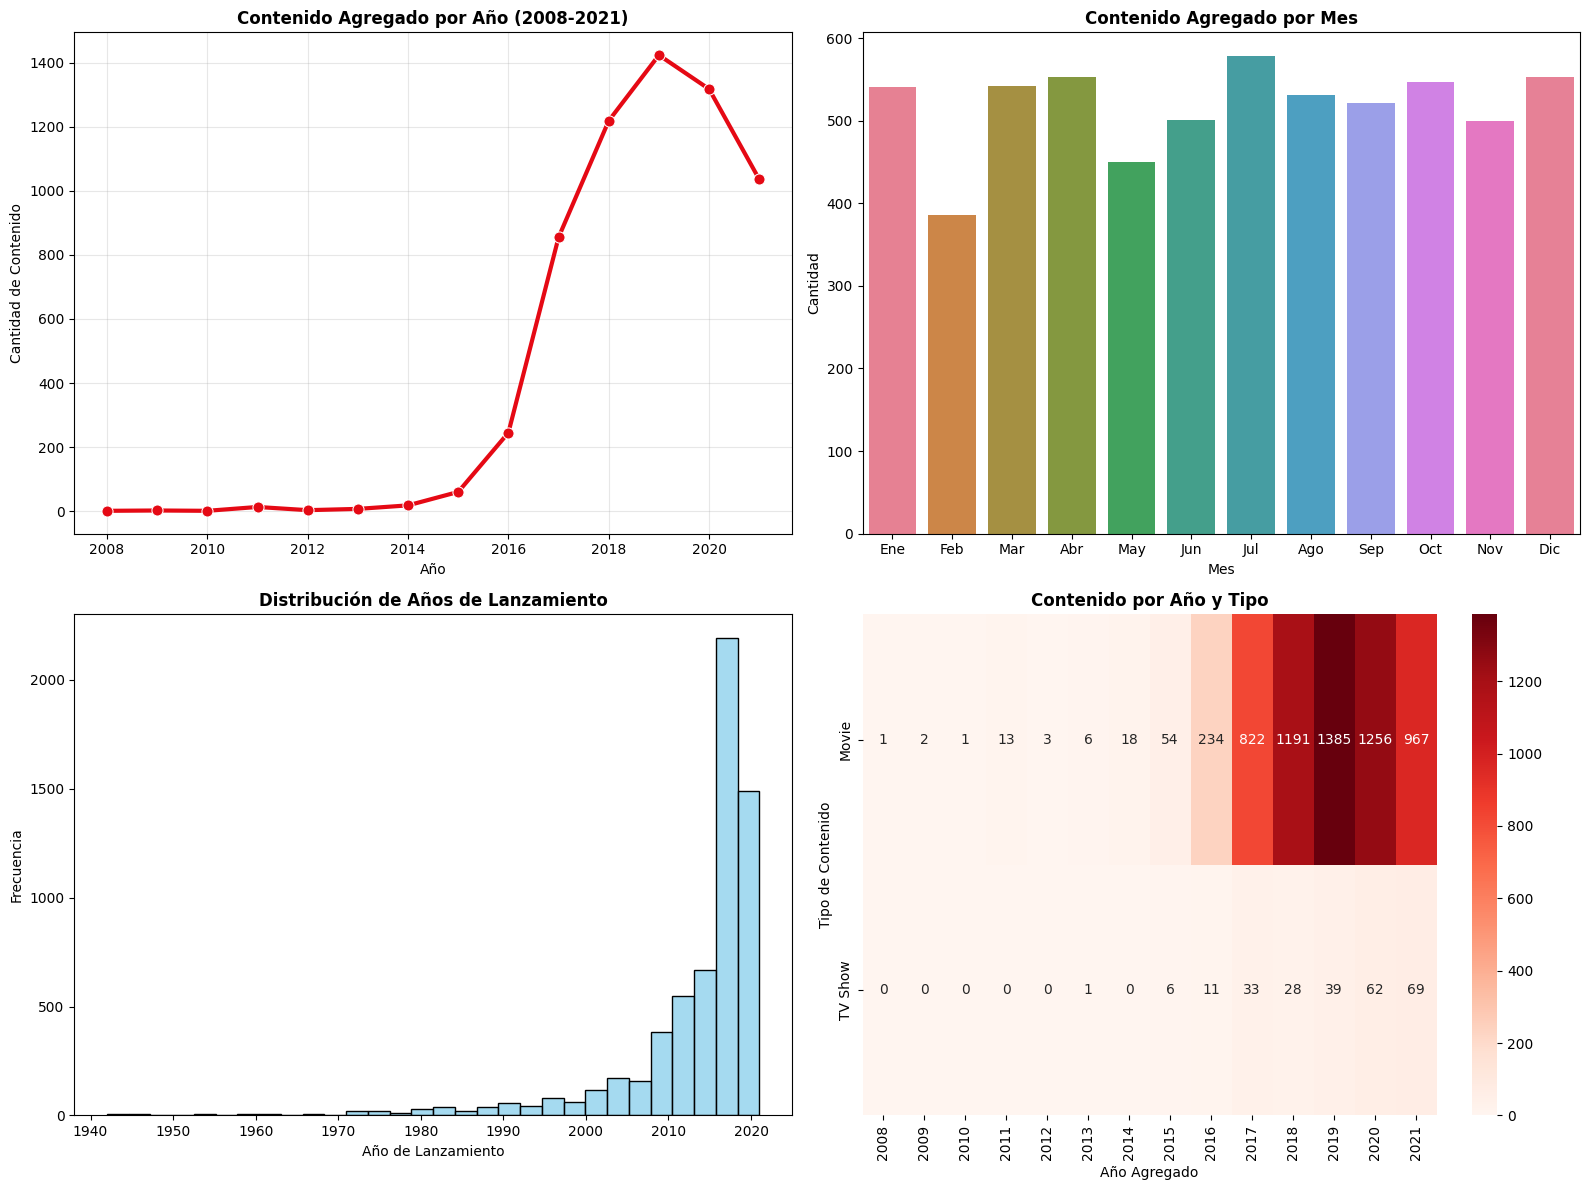

INSIGHTS TEMPORALES:
   • Año con más contenido agregado: 2019 (1,424 contenidos)
   • Mes con más incorporaciones: Jul (578 contenidos)
   • Año de lanzamiento más común: 2017


In [19]:
# ========================================
# 3. ANÁLISIS TEMPORAL: CONTENIDO AGREGADO POR AÑO
# ========================================

# Crear subplots para análisis temporal completo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Contenido agregado por año (desde 2008 para mejor visualización)
contenido_por_ano = df_limpio[df_limpio['added_year'] >= 2008]['added_year'].value_counts().sort_index()
sns.lineplot(x=contenido_por_ano.index, y=contenido_por_ano.values, 
             marker='o', linewidth=3, markersize=8, color='#E50914', ax=ax1)
ax1.set_title('Contenido Agregado por Año (2008-2021)', fontweight='bold')
ax1.set_xlabel('Año')
ax1.set_ylabel('Cantidad de Contenido')
ax1.grid(True, alpha=0.3)

# 2. Contenido agregado por mes
contenido_por_mes = df_limpio['added_month'].value_counts().sort_index()
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
         'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear DataFrame para evitar el warning de 'palette' sin 'hue'
df_meses = pd.DataFrame({
    'mes': list(range(1, 13)),
    'nombre_mes': meses,
    'cantidad': [contenido_por_mes.get(i, 0) for i in range(1, 13)]
})

# Usar el nuevo método recomendado para barplot con hue
sns.barplot(data=df_meses, x='mes', y='cantidad', hue='mes', 
            palette='husl', legend=False, ax=ax2)

# Configurar correctamente los ticks del eje x
ax2.set_xticks(range(len(meses)))
ax2.set_xticklabels(meses)
ax2.set_title('Contenido Agregado por Mes', fontweight='bold')
ax2.set_xlabel('Mes')
ax2.set_ylabel('Cantidad')

# 3. Distribución de años de lanzamiento (histograma)
sns.histplot(data=df_limpio, x='release_year', bins=30, color='skyblue', ax=ax3)
ax3.set_title('Distribución de Años de Lanzamiento', fontweight='bold')
ax3.set_xlabel('Año de Lanzamiento')
ax3.set_ylabel('Frecuencia')

# 4. Heatmap de contenido por año y tipo
pivot_data = df_limpio.pivot_table(values='show_id', index='added_year', 
                                   columns='type', aggfunc='count', fill_value=0)
sns.heatmap(pivot_data.T, annot=True, fmt='d', cmap='Reds', ax=ax4)
ax4.set_title('Contenido por Año y Tipo', fontweight='bold')
ax4.set_xlabel('Año Agregado')
ax4.set_ylabel('Tipo de Contenido')

plt.tight_layout()
plt.show()

# Insights
max_year = contenido_por_ano.idxmax()
max_month = contenido_por_mes.idxmax()
print(f"INSIGHTS TEMPORALES:")
print(f"   • Año con más contenido agregado: {max_year} ({contenido_por_ano[max_year]:,} contenidos)")
print(f"   • Mes con más incorporaciones: {meses[max_month-1]} ({contenido_por_mes[max_month]:,} contenidos)")
print(f"   • Año de lanzamiento más común: {df_limpio['release_year'].mode()[0]}")

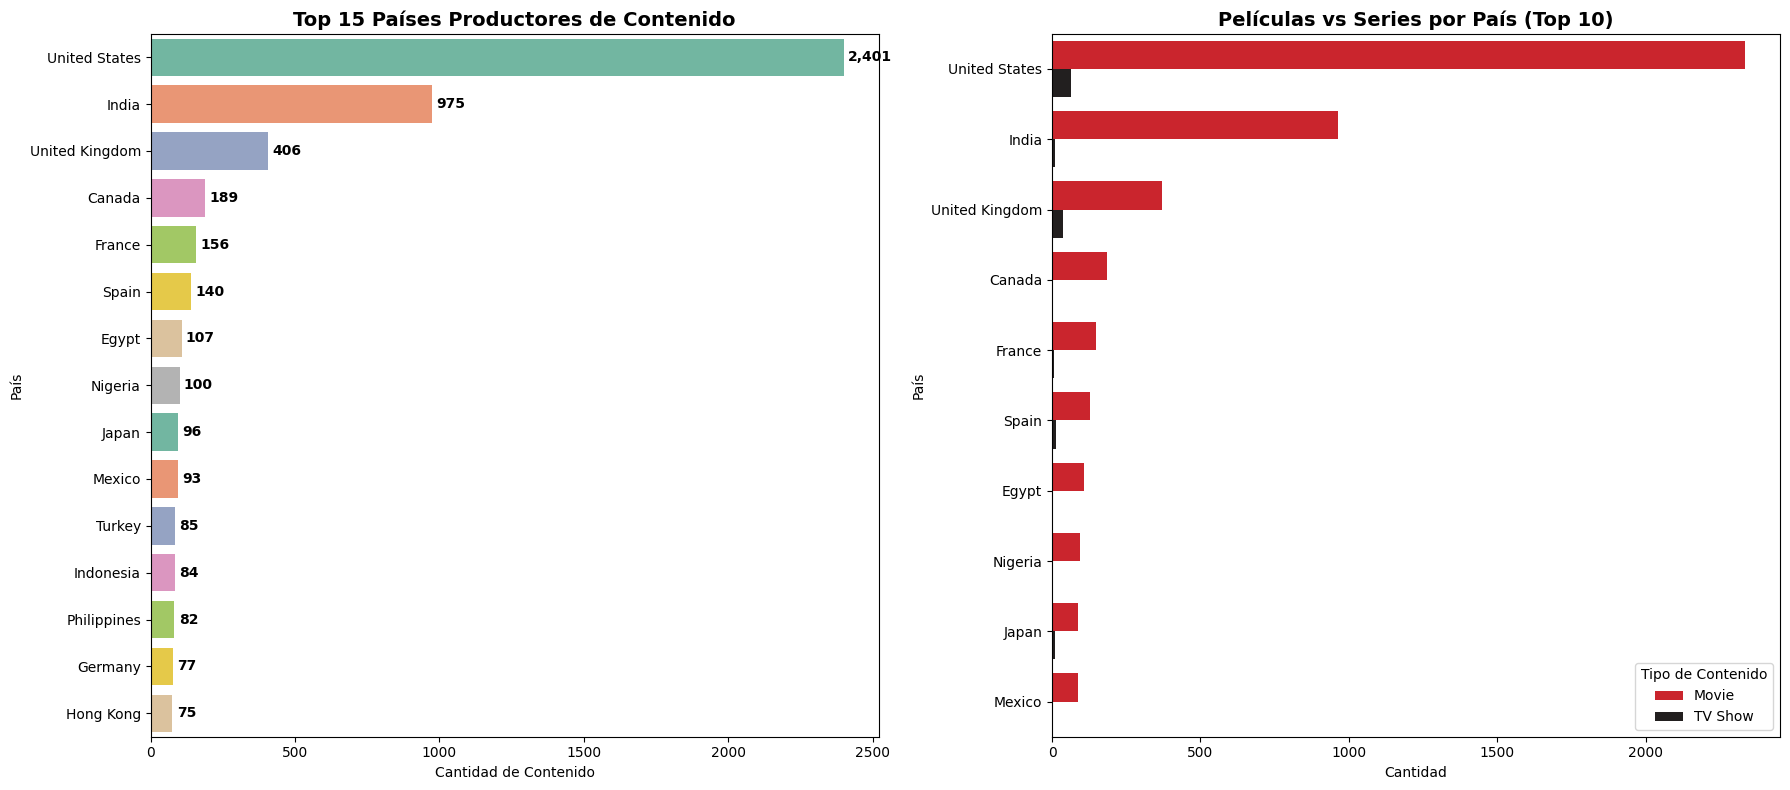

INSIGHT: United States lidera la producción con 2,401 contenidos


In [20]:
# ========================================
# 4. ANÁLISIS GEOGRÁFICO: PAÍSES PRODUCTORES
# ========================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 1. Top 15 países productores
top_paises = df_limpio['country'].value_counts().head(15)

# Crear DataFrame para evitar el warning de 'palette' sin 'hue'
df_paises = pd.DataFrame({
    'pais': top_paises.index,
    'cantidad': top_paises.values
})

# Usar el nuevo método recomendado para barplot con hue
sns.barplot(data=df_paises, y='pais', x='cantidad', hue='pais', 
            palette='Set2', orient='h', legend=False, ax=ax1)
            
ax1.set_title('Top 15 Países Productores de Contenido', fontweight='bold', fontsize=14)
ax1.set_xlabel('Cantidad de Contenido')
ax1.set_ylabel('País')

# Agregar valores
for i, v in enumerate(top_paises.values):
    ax1.text(v + 15, i, f'{v:,}', va='center', fontweight='bold')

# 2. Comparación películas vs series por top 10 países
top_10_paises = df_limpio['country'].value_counts().head(10).index
data_comparacion = []

for pais in top_10_paises:
    pais_data = df_limpio[df_limpio['country'] == pais]
    peliculas = (pais_data['type'] == 'Movie').sum()
    series = (pais_data['type'] == 'TV Show').sum()
    data_comparacion.extend([
        {'País': pais, 'Tipo': 'Movie', 'Cantidad': peliculas},
        {'País': pais, 'Tipo': 'TV Show', 'Cantidad': series}
    ])

df_comparacion = pd.DataFrame(data_comparacion)
sns.barplot(data=df_comparacion, x='Cantidad', y='País', hue='Tipo', 
            palette=['#E50914', '#221F1F'], ax=ax2)
ax2.set_title('Películas vs Series por País (Top 10)', fontweight='bold', fontsize=14)
ax2.set_xlabel('Cantidad')
ax2.legend(title='Tipo de Contenido')

plt.tight_layout()
plt.show()

print(f"INSIGHT: {top_paises.index[0]} lidera la producción con {top_paises.iloc[0]:,} contenidos")

In [ ]:
# RESUMEN ESTADÍSTICO VISUAL
print("="*60)
print("RESUMEN ESTADÍSTICO DEL ANÁLISIS DE NETFLIX")
print("="*60)
print(f"Total de contenido analizado: {len(df_limpio):,}")
print(f"Películas: {len(df_limpio[df_limpio['type'] == 'Movie']):,} ({(len(df_limpio[df_limpio['type'] == 'Movie'])/len(df_limpio)*100):.1f}%)")
print(f"Series: {len(df_limpio[df_limpio['type'] == 'TV Show']):,} ({(len(df_limpio[df_limpio['type'] == 'TV Show'])/len(df_limpio)*100):.1f}%)")
print(f"Países representados: {df_limpio['country'].nunique():,}")
print(f"Géneros diferentes: {df_limpio['genero_principal'].nunique():,}")
print(f"Directores únicos: {df_limpio['director'].nunique():,}")
print(f"Años de contenido: {df_limpio['release_year'].min()} - {df_limpio['release_year'].max()}")
print(f"Año con más contenido agregado: {df_limpio['added_year'].mode()[0]}")
print(f"Género más popular: {df_limpio['genero_principal'].mode()[0]}")
print(f"País con más contenido: {df_limpio['country'].mode()[0]}")
print("="*60)

📊 RESUMEN ESTADÍSTICO DEL ANÁLISIS DE NETFLIX
🎬 Total de contenido analizado: 6,202
🎭 Películas: 5,953 (96.0%)
📺 Series: 249 (4.0%)
🌍 Países representados: 79
🎨 Géneros diferentes: 33
🎬 Directores únicos: 4,527
📅 Años de contenido: 1942 - 2021
📈 Año con más contenido agregado: 2019
🌟 Género más popular: Dramas
🏆 País con más contenido: United States
